<a href="https://colab.research.google.com/github/glimmer-jm/Projects/blob/main/World_Population_analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Population Analysis 2024

## Introduction

The world’s population is a dynamic and ever-evolving phenomenon, shaped by factors such as birth rates, death rates, migration, and societal changes. Understanding population trends provides valuable insights into global demographics, resource allocation, and future planning. This project, "World Population Analysis 2024," aims to explore and visualize key demographic indicators for the year 2024 using data from the United Nations' "World Population Prospects 2024" dataset.

In this analysis, we will:
- Examine the total population across countries and regions as of 2024.
- Investigate key metrics such as life expectancy, fertility rates, and population density.
- Visualize trends and comparisons to highlight significant patterns in global population dynamics.

The dataset used here is the "Compact" version of the UN’s demographic indicators, offering annual estimates and medium projections from 1950 to 2100. Our focus will be on the year 2024, leveraging Python libraries like `pandas`, `matplotlib`, and `seaborn` to process and present the data effectively.

Let’s dive into the numbers and uncover what the world’s population looks like in 2024!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

## World Population Analysis 2024

Welcome to the "World Population Analysis 2024" project! This notebook explores the global population landscape in 2024 using the United Nations' "World Population Prospects 2024" dataset. Population data offers a window into human development, resource needs, and societal trends. Here, we’ll analyze key demographic indicators such as total population, life expectancy, and fertility rates for the year 2024, using Python tools to uncover insights and visualize patterns.

The dataset, sourced from the UN’s "Compact" demographic indicators file, provides annual estimates and projections from 1950 to 2100. Our focus is on 2024, and we’ll leverage libraries like `pandas`, `matplotlib`, and `seaborn` to process and present the data.

Let’s get started by importing the necessary libraries!

The dataset contains population data for 234 countries/regions in 2024, with comparisons to 2023. Here’s the structure based on the columns you provided:

- **Country:** Name of the country/territory.
- **Population 2024:** Population in 2024.
- **Population 2023:** Population in 2023.
- **Area (km2):** Area in square kilometers (some in shorthand, e.g., "3M" for 3 million).
- **Density (/km2):**Population density per square kilometer.
- **Growth Rate:** Annual population growth rate.
- **World %:** Percentage of the world’s population.
-**World Rank:** Rank by population size (1 = highest).

In [4]:
file_path = '/content/drive/MyDrive/Projects Colab/World Population by country 2024.csv'
df= pd.read_csv(file_path)
df.head().style.set_properties(**{"background-color": "#827ca9","color":"#060e0d","border": "1.5px solid black"})

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.000000,0.009200,0.180100,1
1,China,1425178782,1425671352,9.4M,151.000000,-0.000300,0.178000,2
2,United States,341814420,339996563,9.1M,37.000000,0.005300,0.042700,3
3,Indonesia,279798049,277534122,1.9M,149.000000,0.008200,0.035000,4
4,Pakistan,245209815,240485658,770.9K,318.000000,0.019600,0.030600,5


In [5]:
df.shape

(234, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


In [7]:
df.describe().style.set_properties(**{"background-color": "#827ca9","color":"#060e0d","border": "1.5px solid black"})

,Population 2024,Population 2023,Density (/km2),Growth Rate,World %,World Rank
count,234.000000,234.000000,234.000000,234.000000,228.000000,234.000000
mean,34688615.311966,34374424.743590,453.788248,0.009200,0.004446,117.500000
std,138075008.748359,137386405.597263,1990.163274,0.011371,0.017459,67.694165
min,526.000000,518.000000,0.140000,-0.030900,0.000000,1.000000
25%,426456.500000,422598.250000,39.500000,0.001925,0.000100,59.250000
50%,5626359.000000,5643895.000000,98.500000,0.007950,0.000750,117.500000
75%,23922722.250000,23245367.250000,248.250000,0.015675,0.003000,175.750000
max,1441719852.000000,1428627663.000000,21674.000000,0.048300,0.180100,234.000000


## Clean The data

In [14]:
# Convert 'Area (km2)' to numeric
def convert_area(area):
    if isinstance(area, str):
        area = area.upper().strip()
        if 'M' in area:
            return float(area.replace('M', '')) * 1_000_000
        elif 'K' in area:
            return float(area.replace('K', '')) * 1_000
        elif '< 1' in area:
            return 0.5
    return float(area)

df['Area (km2)'] = df['Area (km2)'].apply(convert_area)

# Fill missing 'World %' with 0
df['World %'].fillna(0, inplace=True)

# Ensure numeric types
numeric_cols = ['Population 2024', 'Population 2023', 'Area (km2)', 'Density (/km2)', 'Growth Rate', 'World %']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Add population change
df['Population Change'] = df['Population 2024'] - df['Population 2023']

# Basic Exploration
print("Shape:", df.shape)
print("\nGlimpse:")
print(df.head())
print("\nInfo:")
print(df.info())

# Summary
print("\nSummary Statistics:")
print(df.describe())
print("\nCategorical Summary:")
print(df[['Country']].describe())

Shape: (234, 9)

Glimpse:
         Country  Population 2024  Population 2023  Area (km2)  \
0          India       1441719852       1428627663   3000000.0   
1          China       1425178782       1425671352   9400000.0   
2  United States        341814420        339996563   9100000.0   
3      Indonesia        279798049        277534122   1900000.0   
4       Pakistan        245209815        240485658    770900.0   

   Density (/km2)  Growth Rate  World %  World Rank  Population Change  
0           485.0       0.0092   0.1801           1           13092189  
1           151.0      -0.0003   0.1780           2            -492570  
2            37.0       0.0053   0.0427           3            1817857  
3           149.0       0.0082   0.0350           4            2263927  
4           318.0       0.0196   0.0306           5            4724157  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column             Non-

Total Population in 2024: 8117135983


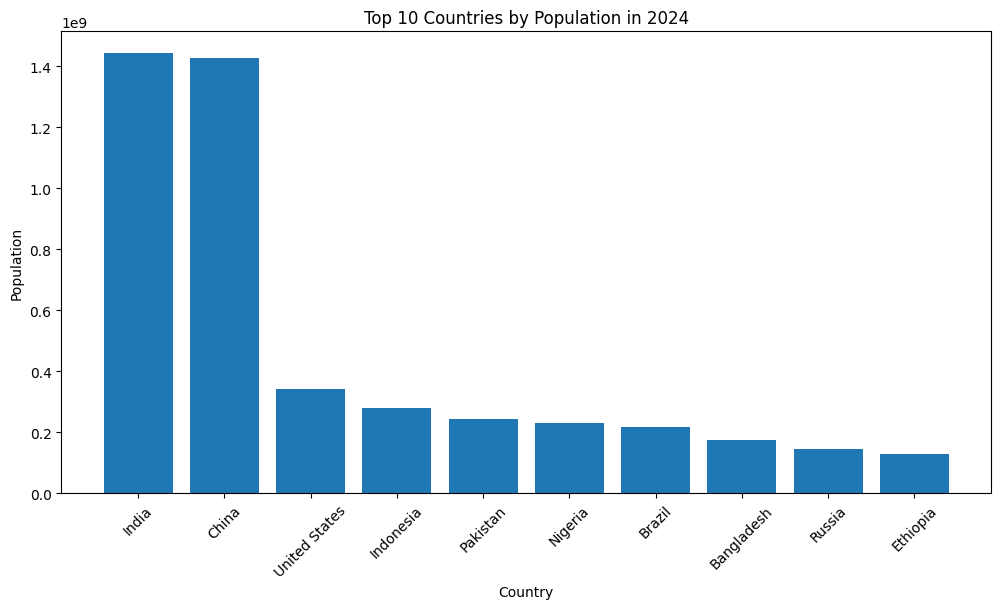

In [15]:
#Let's have a look on the population
total_population_2024 = df['Population 2024'].sum()
print(f"Total Population in 2024: {total_population_2024}")
top_10_countries_2024 = df.nlargest(10, 'Population 2024')
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_2024['Country'], top_10_countries_2024['Population 2024'])
plt.title('Top 10 Countries by Population in 2024')
plt.xlabel('Country')
plt.ylabel('Population (Billions)')
plt.xticks(rotation=45)
plt.show()

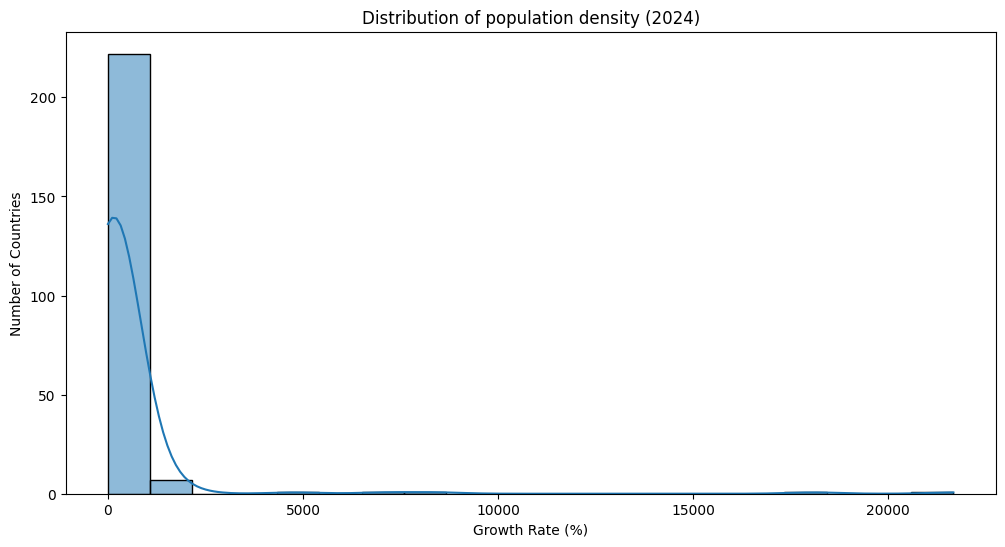

In [16]:
#Population Density
plt.figure(figsize=(12, 6))
sns.histplot(df['Density (/km2)'], bins=20, kde=True)
plt.title('Distribution of population density (2024)')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Number of Countries')
plt.show()

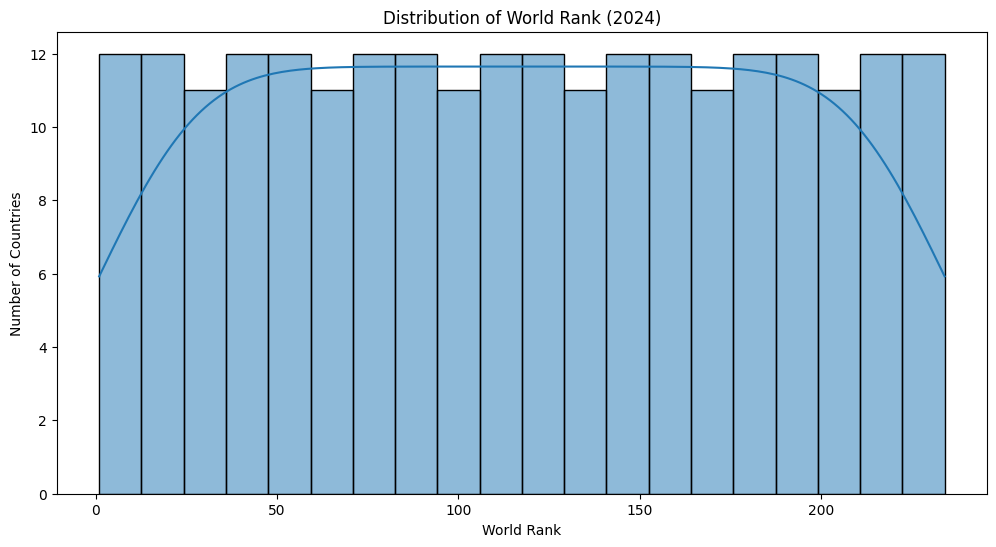

In [17]:
#Rank
plt.figure(figsize=(12, 6))
sns.histplot(df['World Rank'], bins=20, kde=True)
plt.title('Distribution of World Rank (2024)')
plt.xlabel('World Rank')
plt.ylabel('Number of Countries')
plt.show()

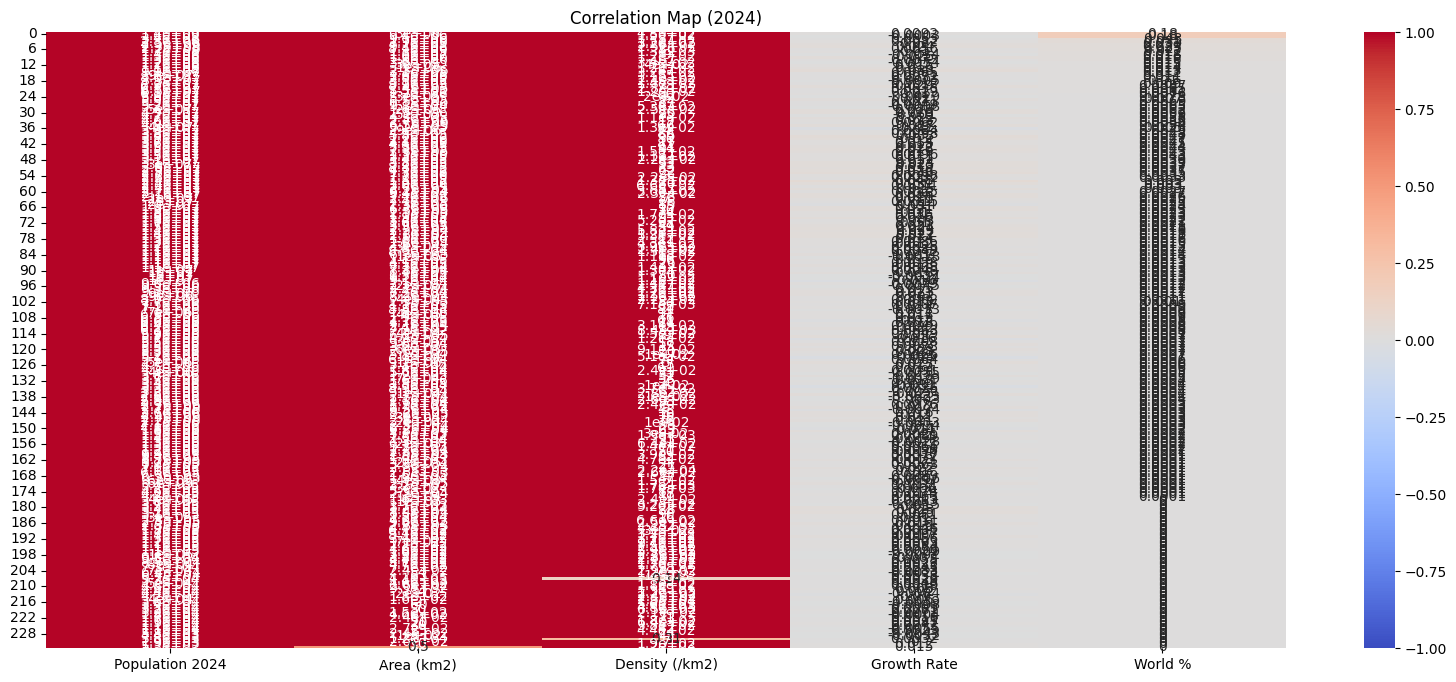

In [19]:
#Correlation
corr= df[['Population 2024', 'Area (km2)', 'Density (/km2)', 'Growth Rate', 'World %']]
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin= -1, vmax= 1)
plt.title('Correlation Map (2024)')
plt.show()

The code analyzes world population data for 2024, sourced from a CSV file.  Let's break down the visualizations:

1. **Top 10 Countries by Population in 2024:** A bar chart displays the top 10 most populous countries in 2024.  It visually compares the populations of these nations, highlighting the most populous.

2. **Distribution of Population Density (2024):** A histogram shows the distribution of population density across all countries.  The x-axis represents population density (people per square kilometer), and the y-axis represents the number of countries with that density.  The KDE (Kernel Density Estimate) line smooths the distribution, providing a visual representation of the overall density pattern. This helps identify whether most countries have low, medium, or high population density.

3. **Distribution of World Rank (2024):** Similar to the density histogram, this displays the distribution of world population rank. The x-axis shows the rank (1 being the most populous), and the y-axis is the number of countries holding that rank. The KDE helps visualize the distribution of ranks.  This plot provides a sense of the population distribution among countries – whether the population is evenly spread or concentrated among a few nations.

4. **Correlation Map (2024):**  A heatmap visualizes the correlations between several key variables: 'Population 2024', 'Area (km2)', 'Density (/km2)', 'Growth Rate', and 'World %'. Each square in the heatmap represents the correlation coefficient between two variables.  A darker shade of red indicates a strong positive correlation, dark blue a strong negative correlation, and lighter colors indicate weaker correlations.  This heatmap allows us to quickly identify which factors are strongly related to each other. For example, a positive correlation between 'Population 2024' and 'Area (km2)' would suggest that larger countries tend to have larger populations (though density is a more useful metric for this).


In essence, the code performs exploratory data analysis (EDA) using a combination of summary statistics, basic data cleaning, and visualizations to understand the global population landscape in 2024.  The graphs provide visual insights into population size, distribution, and the relationships between key demographic indicators.